In [126]:
import numpy as np
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import matplotlib.pyplot as plt

In [127]:
height, width = 200, 200
name = 'Fern'

In [128]:
img = Image.open('../assets/fern_pout.webp').convert('L').resize((width, height))
arr = np.array(img)

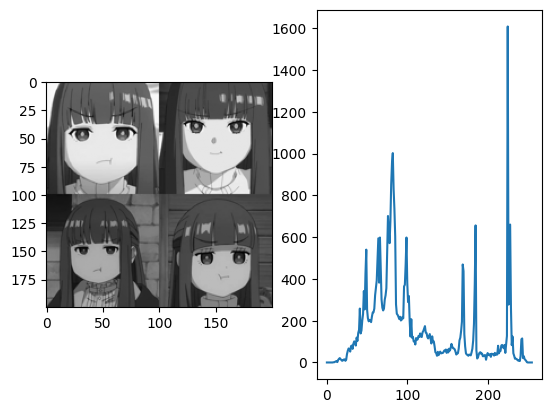

In [129]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(img, 'gray')
axes[1].plot(img.histogram())

In [130]:
for i in range(height):
    for j in range(width):
        arr[i, j] = 255 - arr[i, j]

negative = Image.fromarray(arr)

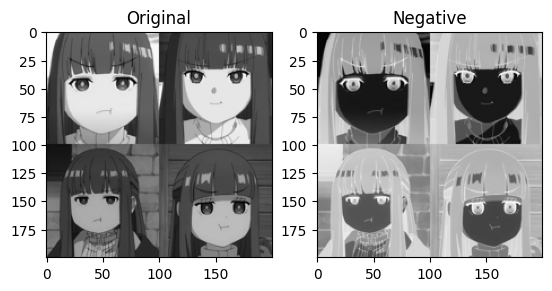

In [131]:
fig, axes = plt.subplots(1, 2)
axes[0].set_title('Original')
axes[0].imshow(img, 'gray')
axes[1].set_title('Negative')
axes[1].imshow(negative, 'gray')

In [132]:
name_img = Image.new('L', (width, height), 0)
pen = ImageDraw.Draw(name_img, 'L')
pen.text((10, 10), name, 255, ImageFont.truetype('../assets/Chewy-Regular.ttf', 30))
name_arr = np.array(name_img)

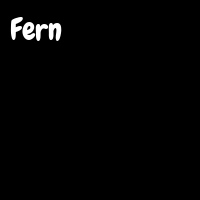

In [133]:
display(name_img)

In [134]:
for i in range(height):
    for j in range(width):
        if name_arr[i, j] > 0:
            arr[i, j] = (arr[i, j] ^ name_arr[i, j])

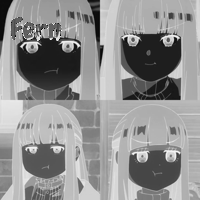

In [135]:
display(Image.fromarray(arr))